In [1]:
#importing the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.svm import SVC

##Helper functions. Use when needed. 
def show_orignal_images(pixels):
	#Displaying Orignal Images
	fig, axes = plt.subplots(6, 10, figsize=(11, 7),
	                         subplot_kw={'xticks':[], 'yticks':[]})
	for i, ax in enumerate(axes.flat):
	    ax.imshow(np.array(pixels)[i].reshape(64, 64), cmap='gray')
	plt.show()

def show_eigenfaces(pca):
	#Displaying Eigenfaces
	fig, axes = plt.subplots(3, 8, figsize=(9, 4),
	                         subplot_kw={'xticks':[], 'yticks':[]})
	for i, ax in enumerate(axes.flat):
	    ax.imshow(pca.components_[i].reshape(64, 64), cmap='gray')
	    ax.set_title("PC " + str(i+1))
	plt.show()




In [3]:
##Reading the dataset.
#see the dataset below as we have 10  images of one person and overall there are 40 persons means 40 classes . So each class is having only 10 examples.
#So by taking each example/image(which is 64 * 64 = 4096) of one class/person we have flatten it in a single row with 4096 colums . so for one 
#particular class we will have 10 rows of the same class as one person is having 10 images of diff kinds.
#the target colums is a label for that particular class/person as we have 40 diff persons so labels are from 0 - 39

df = pd.read_csv('face_data.csv')
df.head(11)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,4057,4058,4059,4060,4061,4062,4063,4064,4065,4066,4067,4068,4069,4070,4071,4072,4073,4074,4075,4076,4077,4078,4079,4080,4081,4082,4083,4084,4085,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095,target
0,0.309917,0.367769,0.417355,0.442149,0.528926,0.607438,0.657025,0.677686,0.690083,0.685950,0.702479,0.698347,0.694215,0.698347,0.690083,0.694215,0.690083,0.698347,0.702479,0.702479,0.698347,0.706612,0.710744,0.719008,0.727273,0.756198,0.772727,0.776860,0.776860,0.756198,0.760331,0.780992,0.760331,0.768595,0.756198,0.739669,0.743802,0.739669,0.743802,0.719008,...,0.752066,0.694215,0.690083,0.681818,0.681818,0.657025,0.648760,0.636364,0.632231,0.636364,0.623967,0.619835,0.644628,0.681818,0.685950,0.677686,0.681818,0.673554,0.665289,0.632231,0.582645,0.541322,0.537190,0.537190,0.553719,0.570248,0.611570,0.632231,0.657025,0.665289,0.669422,0.652893,0.661157,0.475207,0.132231,0.148760,0.152893,0.161157,0.157025,0
1,0.454545,0.471074,0.512397,0.557851,0.595041,0.640496,0.681818,0.702479,0.710744,0.702479,0.710744,0.698347,0.702479,0.706612,0.706612,0.714876,0.714876,0.706612,0.698347,0.714876,0.698347,0.723140,0.731405,0.743802,0.756198,0.772727,0.768595,0.785124,0.764463,0.756198,0.731405,0.743802,0.735537,0.719008,0.706612,0.714876,0.719008,0.710744,0.710744,0.706612,...,0.661157,0.652893,0.628099,0.632231,0.644628,0.640496,0.628099,0.632231,0.636364,0.628099,0.619835,0.619835,0.603306,0.590909,0.561983,0.516529,0.533058,0.578512,0.570248,0.561983,0.557851,0.545455,0.111570,0.095041,0.152893,0.152893,0.128099,0.136364,0.132231,0.136364,0.157025,0.136364,0.148760,0.152893,0.152893,0.152893,0.152893,0.152893,0.152893,0
2,0.318182,0.400826,0.491736,0.528926,0.586777,0.657025,0.681818,0.685950,0.702479,0.698347,0.702479,0.706612,0.706612,0.714876,0.710744,0.706612,0.706612,0.706612,0.723140,0.719008,0.719008,0.710744,0.710744,0.752066,0.756198,0.764463,0.785124,0.797521,0.838843,0.826446,0.842975,0.847107,0.830578,0.818182,0.793388,0.768595,0.760331,0.756198,0.739669,0.710744,...,0.714876,0.706612,0.685950,0.665289,0.652893,0.644628,0.636364,0.623967,0.636364,0.657025,0.644628,0.677686,0.681818,0.690083,0.690083,0.690083,0.681818,0.661157,0.652893,0.636364,0.586777,0.545455,0.570248,0.607438,0.603306,0.595041,0.578512,0.607438,0.413223,0.074380,0.132231,0.181818,0.136364,0.128099,0.148760,0.144628,0.140496,0.148760,0.152893,0
3,0.198347,0.194215,0.194215,0.194215,0.190083,0.190083,0.243802,0.404959,0.483471,0.516529,0.537190,0.566116,0.574380,0.586777,0.611570,0.632231,0.640496,0.657025,0.673554,0.694215,0.702479,0.719008,0.727273,0.719008,0.723140,0.710744,0.739669,0.747934,0.756198,0.756198,0.764463,0.772727,0.785124,0.785124,0.805785,0.818182,0.805785,0.809917,0.793388,0.789256,...,0.442149,0.479339,0.512397,0.537190,0.557851,0.566116,0.586777,0.586777,0.615702,0.632231,0.661157,0.681818,0.673554,0.714876,0.710744,0.706612,0.690083,0.681818,0.623967,0.615702,0.586777,0.582645,0.578512,0.590909,0.590909,0.611570,0.628099,0.644628,0.657025,0.652893,0.636364,0.657025,0.685950,0.727273,0.743802,0.764463,0.752066,0.752066,0.739669,0
4,0.500000,0.545455,0.582645,0.623967,0.648760,0.690083,0.694215,0.714876,0.723140,0.731405,0.739669,0.739669,0.764463,0.756198,0.764463,0.785124,0.793388,0.797521,0.814050,0.809917,0.809917,0.818182,0.830578,0.830578,0.842975,0.838843,0.838843,0.838843,0.830578,0.818182,0.805785,0.801653,0.797521,0.793388,0.793388,0.785124,0.797521,0.801653,0.793388,0.793388,...,0.557851,0.574380,0.595041,0.599174,0.611570,0.623967,0.636364,0.669422,0.681818,0.698347,0.698347,0.714876,0.710744,0.764463,0.756198,0.785124,0.797521,0.739669,0.714876,0.681818,0.619835,0.293388,0.144628,0.152893,0.152893,0.157025,0.148760,0.161157,0.161157,0.190083,0.161157,0.177686,0.173554,0.177686,0.177686,0.177686,0.177686,0.173554,0.173554,0
5,0.549587,0.545455,0.541322,0.537190,0.537190,0.533058,0.528926,0.533058,0.590909,0.611

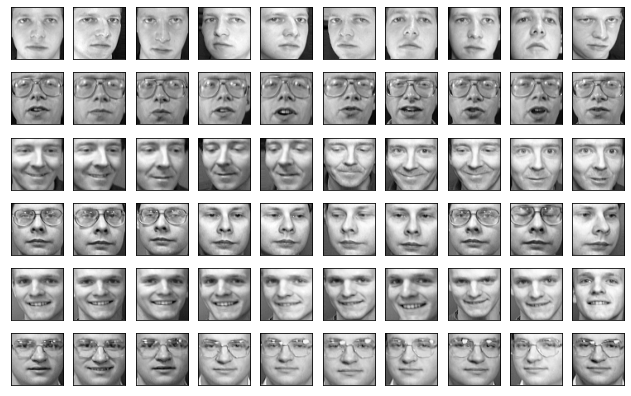

In [7]:
#visualizing the dataset in relation to the selected pixels

labels  = df['target']
pixels = df.drop('target', axis = 1) 
#pixels.head()
show_orignal_images(pixels)


In [9]:
## Step 2: Split Dataset into training and testing
##train_test_split method split arrays or matrices into random train and test subsets

X_train, X_test, y_train, y_test = train_test_split(pixels, labels )

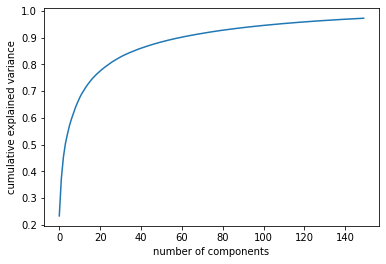

In [28]:
##Performing PCA and choosing the best possible value for no of components to taken with the help of the below plot
pca = PCA(n_components= 150).fit(X_train)  
plt.plot(np.cumsum(pca.explained_variance_ratio_)) #np.cumsum return the cummulative sum of the elements along the given axis
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()

#from the plot below we can say that in first 150(approx) principal components we are capturing almost 96% of total variation in our data 
#so I intitially started with 200 components and after seeing the plot resetting the n_components to 150


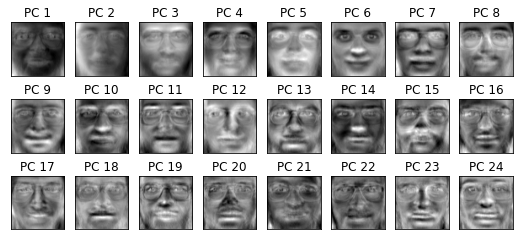

In [29]:
#display of the eigen faces after application of the PCA to X_train
show_eigenfaces(pca)

#The below eigen faces are giving us the sense of along which direction do we have the max variation in the data
#like in the 1st eigen face we can say that the max variance is around eye....likewise around moustache or around specs
#max variance can be seen as bright spots in each image below

In [30]:
## Projecting the training data to principal components

##############
X_train_pca = pca.transform(X_train)
X_train_pca


array([[ 7.93704425,  0.01229523, -0.38201826, ...,  0.09802613,
        -0.12629307,  0.18890586],
       [ 8.78496966,  0.17147422, -0.48581348, ..., -0.04249819,
         0.05540755, -0.04253326],
       [ 4.87415569, -2.63359374, -0.76819267, ...,  0.16532729,
        -0.15408285, -0.06353418],
       ...,
       [-1.10829707, -4.01976199, -0.66055049, ...,  0.15456496,
         0.02037758,  0.05683938],
       [-1.30099945,  1.7137214 , -5.18390679, ..., -0.05184336,
        -0.07318514, -0.12851799],
       [-3.5100815 , -2.90480187, -1.96368441, ...,  0.09552958,
         0.02033298,  0.14845605]])

In [31]:
##Initializing a Classifer to fit the training data
#use a support vector classifier (SVC) with a non-linear Rbf kernel, And the parmamets of the SVC can be chosen as trial and error method or we can
#grid search to come up with such parameters

classifier = SVC(kernel = 'rbf', C =1000, gamma = 0.01) #gamma is the parameter for the rbf kernel
classifier.fit(X_train_pca, y_train)



SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [32]:
##Testing and getting the classification report

#before predicting on the test data first project the test data onto the PCA space so that the weights of the X_train_pca can be compared accordingly.
X_test_pca = pca.transform(X_test)

print("Predicting people's names on the test set")
t0 = time()
#prediction
y_pred = classifier.predict(X_test_pca)
print("done in %0.3fs" % (time()  - t0))
print(classification_report(y_test, y_pred))


#Below The support is the number of occurrences of each class in y_true i.e y_test here.

Predicting people's names on the test set
done in 0.015s
              precision    recall  f1-score   support

           0       0.33      0.50      0.40         2
           2       1.00      0.75      0.86         4
           3       0.67      0.67      0.67         3
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         5
           7       1.00      0.50      0.67         2
           8       1.00      1.00      1.00         4
           9       1.00      0.50      0.67         2
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         3
          12       1.00      0.33      0.50         3
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         2
          15       1.00      0.67      0.80         3
          16       0.67      1.00      0.80         2
          17       1.00 